Successfully read G0_09102025.csv into DataFrame 'G0_09102025' with target 'G0'
Successfully read G1_09102025.csv into DataFrame 'G1_09102025' with target 'G1'
Successfully read G2_09102025.csv into DataFrame 'G2_09102025' with target 'G2'
Successfully read G10_09102025.csv into DataFrame 'G10_09102025' with target 'G10'
Successfully read G4_09102025.csv into DataFrame 'G4_09102025' with target 'G4'

Combined DataFrame shape: (136, 3003)

Plotting unscaled sample data...


/tmp/ipython-input-1088131090.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_indices = combined_df.groupby('target').apply(lambda x: x.sample(1, random_state=42)).index.get_level_values(1)


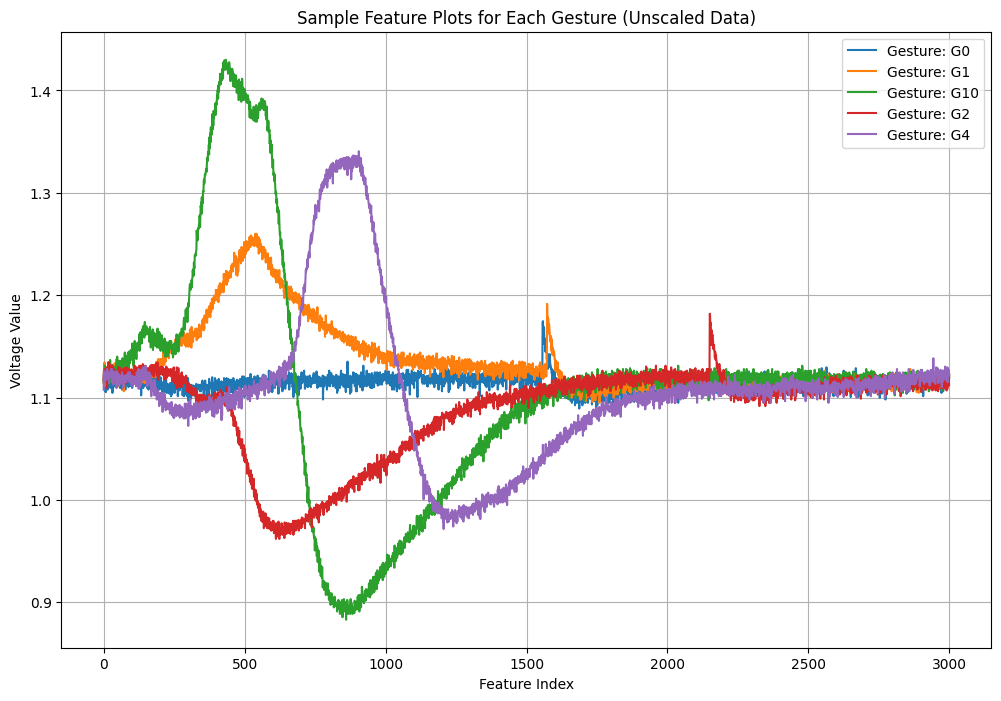


Combined DataFrame after dropping Timestamp shape: (136, 3002)

Mapping of original target values to encoded values:
{'G0': np.int64(0), 'G1': np.int64(1), 'G10': np.int64(2), 'G2': np.int64(3), 'G4': np.int64(4)}

Shape of X_train: (108, 3000)
Shape of X_test: (28, 3000)
Shape of y_train: (108,)
Shape of y_test: (28,)

Scaled X_train shape: (108, 3000)
Scaled X_test shape: (28, 3000)

--- Training and Evaluating Logistic Regression ---
Logistic Regression Model Performance:
Accuracy: 0.9643
Classification Report:
              precision    recall  f1-score   support

          G0       0.86      1.00      0.92         6
          G1       1.00      0.80      0.89         5
         G10       1.00      1.00      1.00         6
          G2       1.00      1.00      1.00         6
          G4       1.00      1.00      1.00         5

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96  

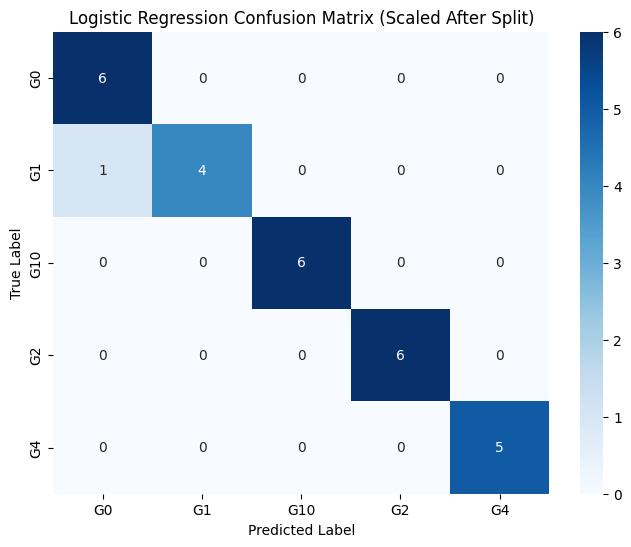


--- Training and Evaluating Random Forest ---
Random Forest Model Performance:
Accuracy: 0.8929
Classification Report:
              precision    recall  f1-score   support

          G0       0.75      1.00      0.86         6
          G1       0.80      0.80      0.80         5
         G10       1.00      1.00      1.00         6
          G2       1.00      1.00      1.00         6
          G4       1.00      0.60      0.75         5

    accuracy                           0.89        28
   macro avg       0.91      0.88      0.88        28
weighted avg       0.91      0.89      0.89        28



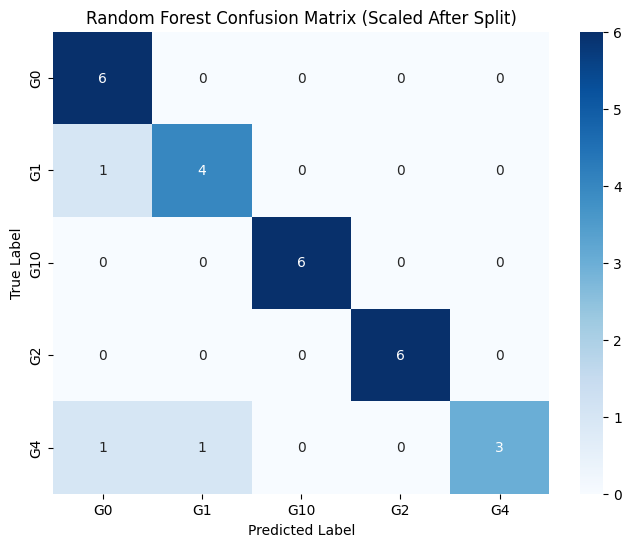


--- Training and Evaluating SVM ---
Support Vector Machine (SVM) Model Performance:
Accuracy: 0.9286
Classification Report:
              precision    recall  f1-score   support

          G0       1.00      1.00      1.00         6
          G1       1.00      0.80      0.89         5
         G10       0.75      1.00      0.86         6
          G2       1.00      1.00      1.00         6
          G4       1.00      0.80      0.89         5

    accuracy                           0.93        28
   macro avg       0.95      0.92      0.93        28
weighted avg       0.95      0.93      0.93        28



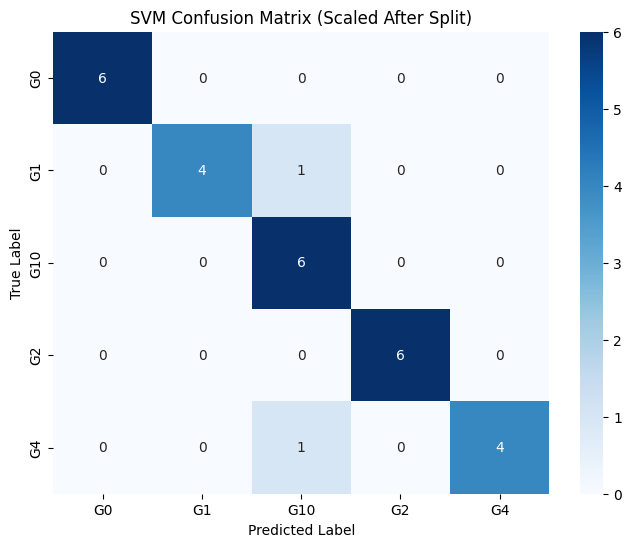


--- Training and Evaluating DNN ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Deep Neural Network (DNN) Model Performance:
Accuracy: 0.8929
Classification Report:
              precision    recall  f1-score   support

          G0       0.86      1.00      0.92         6
          G1       1.00      0.80      0.89         5
         G10       0.86      1.00      0.92         6
          G2       0.86      1.00      0.92         6
          G4       1.00      0.60      0.75         5

    accuracy                           0.89        28
   macro avg       0.91      0.88      0.88        28
weighted avg       0.91      0.89      0.89        28



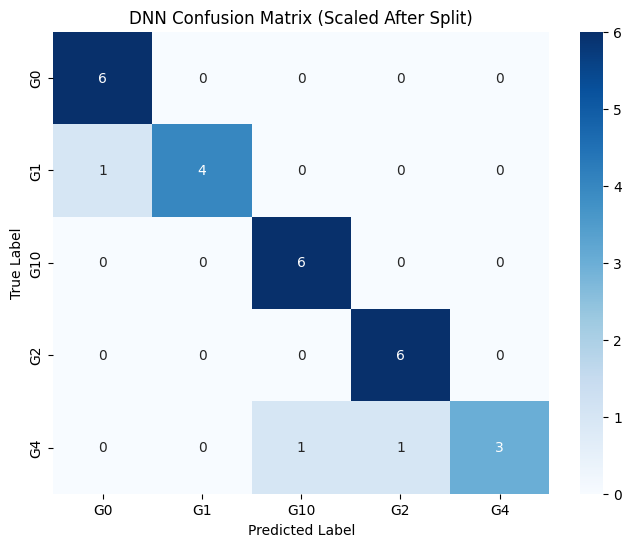


## Model Performance Summary
Here is a summary of the accuracy achieved by each model on the test set:
*   **Logistic Regression:** 0.9643
*   **Support Vector Machine (SVM):** 0.9286
*   **Random Forest:** 0.8929
*   **Deep Neural Network (DNN):** 0.8929

Based on accuracy, the Logistic Regression model performed the best on this dataset.

## Insights on Model Performance
Based on the evaluation, the Logistic Regression model achieved the highest accuracy on this dataset compared to Random Forest, SVM, and the simple Deep Neural Network. Several factors could contribute to this:
*   **Potential Linear Separability:** The gesture classes might be largely linearly separable in the feature space after scaling, which Logistic Regression is well-suited to handle.
*   **Dataset Size:** With a relatively small dataset, simpler models like Logistic Regression may be less prone to overfitting compared to more complex models.
*   **Feature Relevance:** If a subset of features are highly discri

In [44]:
import pandas as pd
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Loading and Target Creation
files = os.listdir('.')
csv_files = [f for f in files if f.endswith('.csv')]
g_csv_files = [f for f in csv_files if re.match(r'G\d+_.*\.csv', f)] # Filter for files starting with G#_

# Gesture Key:
# - G0: no gesture
# - G1: lower hand
# - G2: lift hand
# - G10: two hands swimming motion
# - G4: left hand swipe left


dfs = {}
for csv_file in g_csv_files:
    try:
        df_name = csv_file.replace('.csv', '')
        gesture_label = csv_file.split('_')[0]
        dfs[df_name] = pd.read_csv(csv_file)
        dfs[df_name]['target'] = gesture_label
        print(f"Successfully read {csv_file} into DataFrame '{df_name}' with target '{gesture_label}'")
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")

# Combine DataFrames
combined_df = pd.concat([dfs[df_name] for df_name in dfs], ignore_index=True)
print("\nCombined DataFrame shape:", combined_df.shape)

# Plot unscaled sample data from each category
print("\nPlotting unscaled sample data...")
unique_targets = combined_df['target'].unique()
# Ensure random_state is used for reproducibility even with apply DeprecationWarning
sample_indices = combined_df.groupby('target').apply(lambda x: x.sample(1, random_state=42)).index.get_level_values(1)
sample_df = combined_df.loc[sample_indices]

feature_columns_unscaled = [col for col in combined_df.columns if col.startswith('V')]

plt.figure(figsize=(12, 8))
for index, row in sample_df.iterrows():
    gesture_label = row['target']
    feature_values = row[feature_columns_unscaled].values
    plt.plot(feature_values, label=f'Gesture: {gesture_label}')

plt.xlabel('Feature Index')
plt.ylabel('Voltage Value')
plt.title('Sample Feature Plots for Each Gesture (Unscaled Data)')
plt.legend()
plt.grid(True)
plt.show()


# Drop Timestamp column
combined_df.drop('Timestamp', axis=1, inplace=True)
print("\nCombined DataFrame after dropping Timestamp shape:", combined_df.shape)

# Define features (X) and target (y)
X = combined_df.drop(['SessionID', 'target'], axis=1)
y = combined_df['target']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("\nMapping of original target values to encoded values:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Scaling features AFTER splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)

# --- Logistic Regression ---
print("\n--- Training and Evaluating Logistic Regression ---")
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
cm = confusion_matrix(y_test, y_pred)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix (Scaled After Split)')
plt.show()

# --- Random Forest ---
print("\n--- Training and Evaluating Random Forest ---")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix (Scaled After Split)')
plt.show()

# --- Support Vector Machine (SVM) ---
print("\n--- Training and Evaluating SVM ---")
model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Model Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:")
print(report_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix (Scaled After Split)')
plt.show()

# --- Deep Neural Network (DNN) ---
print("\n--- Training and Evaluating DNN ---")
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model_dnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model with less verbose output
history = model_dnn.fit(X_train_scaled, y_train_onehot,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=0) # Reduced verbose to 0

loss, accuracy_dnn = model_dnn.evaluate(X_test_scaled, y_test_onehot, verbose=0)
y_pred_dnn_probs = model_dnn.predict(X_test_scaled)
y_pred_dnn = np.argmax(y_pred_dnn_probs, axis=1)

report_dnn = classification_report(y_test, y_pred_dnn, target_names=label_encoder.classes_)
cm_dnn = confusion_matrix(y_test, y_pred_dnn)

print("Deep Neural Network (DNN) Model Performance:")
print(f"Accuracy: {accuracy_dnn:.4f}")
print("Classification Report:")
print(report_dnn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DNN Confusion Matrix (Scaled After Split)')
plt.show()

# Print the model performance summary
print("\n## Model Performance Summary")
print("Here is a summary of the accuracy achieved by each model on the test set:")
print(f"*   **Logistic Regression:** {accuracy:.4f}")
print(f"*   **Support Vector Machine (SVM):** {accuracy_svm:.4f}")
print(f"*   **Random Forest:** {accuracy_rf:.4f}")
print(f"*   **Deep Neural Network (DNN):** {accuracy_dnn:.4f}")
print("\nBased on accuracy, the Logistic Regression model performed the best on this dataset.")

# Print insights markdown
print("\n## Insights on Model Performance")
print("Based on the evaluation, the Logistic Regression model achieved the highest accuracy on this dataset compared to Random Forest, SVM, and the simple Deep Neural Network. Several factors could contribute to this:")
print("*   **Potential Linear Separability:** The gesture classes might be largely linearly separable in the feature space after scaling, which Logistic Regression is well-suited to handle.")
print("*   **Dataset Size:** With a relatively small dataset, simpler models like Logistic Regression may be less prone to overfitting compared to more complex models.")
print("*   **Feature Relevance:** If a subset of features are highly discriminative, a linear model can effectively utilize them.")
print("*   **Hyperparameter Tuning:** The default hyperparameters used for the other models might not be optimal for this dataset.")
print("Further analysis, such as visualizing decision boundaries, feature importance analysis, or comprehensive hyperparameter tuning, would be needed to confirm these hypotheses.")